## Project 1: Inventory Management System for an Indian Grocery Store

**Objective:** 

The objective of this mini-project is to create an efficient Inventory Management System
(IMS) for a traditional Indian grocery store. This system will help the store owner keep track of their
inventory, manage stock levels, and generate reports for informed decision-making.
Background: In India, traditional grocery stores play a crucial role in serving the daily needs of
consumers. These stores carry a wide range of products, including grains, spices, dairy, and more. To
remain competitive and ensure customer satisfaction, it is essential for store owners to maintain an
accurate inventory and manage stock effectively.

**Assignment:**


#### ERD Diagram

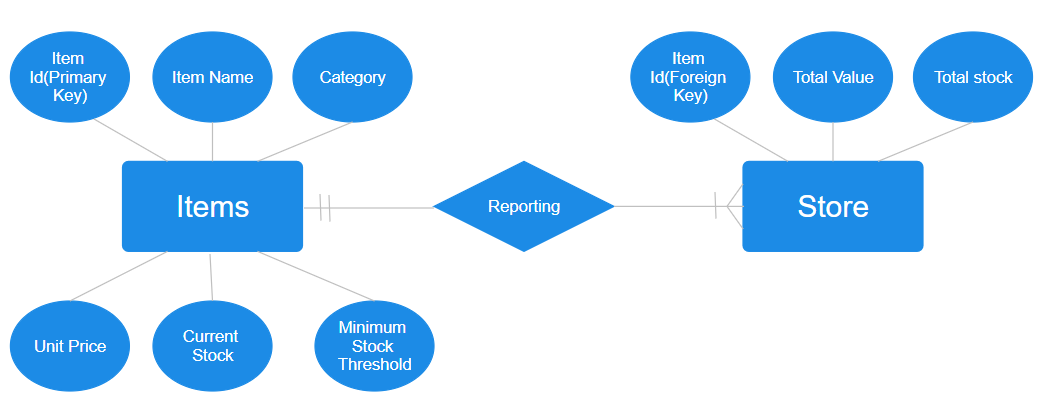

#### Phase 1: Inventory Data Entry

Create a Python program that allows the user to input details of grocery items into the system. Each item should have the following attributes:

1. Item ID (unique identifier)
2. Item Name
3. Category (e.g., grains, spices, dairy, etc.)
4. Unit Price
5. Current Stock Quantity
6. Minimum Stock Threshold (the minimum quantity at which the item needs to be reordered) Implement a loop to continue adding items until the user decides to stop. Use conditional statements to check if the entered data is valid (e.g., non-negative prices, positive stock quantities).

#### Menu 

In [ ]:
print("-"*10, 'Choose one option to proceed', "-"*10, "\n")
def menu():
    print("1. Enter For adding new Item")
    print("2. Display the list of all Items in Inventory")
    print("3. Enter to Search for an Item by name or Category")
    print("4. Update the stock quantity of an item")
    print("5. Generate minimum stock threshold fallen below list")
    print("6. Generate inventory report:")
    print("7. Exit")
menu()

### Items Entry

In [ ]:
inventory = []

def item_input():
    
    while True:
        try:
            item_id = input("Enter Item ID: ")
            item_name = input("Enter Item Name: ")
            category = input("Enter Category (e.g., grains, spices, dairy): ")
            unit_price = float(input("Enter Unit Price: "))
            current_stock = int(input("Enter Current Stock Quantity: "))
            min_stock = int(input("Enter Minimum Stock Threshold: "))

            if unit_price < 0 or current_stock <= 0 or min_stock <= 0:
                print("Error: Unit price must be non-negative, and stock quantities must be positive.")
                continue

            inventory.append({
                    "Item ID": item_id,
                    "Item Name": item_name,
                    "Category": category,
                    "Unit Price": unit_price,
                    "Current Stock": current_stock,
                    "Min Stock": min_stock
                })

            print(f"Item '{item_name}' added successfully!")

            continue_adding = input("Do you want to add another item? (yes/no): ")
            if continue_adding != "yes":
                break
        except ValueError:
            print("Invalid input. Please enter valid data.")
            continue
item_input()

### Item Display

In [ ]:
def display_items():
    if not inventory:
        print("No items in inventory.")
    else:
        print("\n=== Inventory Items ===")
        for item in inventory:
            print(item)
display_items()

#### Searching an Item

In [ ]:
def search_item():
        item_to_search = input("Enter Item Name or Category to search: ")
        result = [item for item in inventory if item_to_search in item["Item Name"] or item_to_search in item["Category"]]

        if result:
            print("\n=== Search Results ===")
            for item in result:
                print(item)
        else:
            print("No matching items found.")

search_item()

#### Update stock

In [ ]:
def update_stock():
        item_id = input("Enter Item ID to update stock: ")
        item = next((item for item in inventory if item["Item ID"] == item_id), None)

        if item:
            try:
                change = int(input("Enter the stock change (positive to add, negative to subtract): "))
                new_stock = item["Current Stock"] + change

                if new_stock < 0:
                    print("Error: Stock cannot be negative.")
                else:
                    item["Current Stock"] = new_stock
                    print(f"Stock updated. New stock for '{item['Item Name']}': {item['Current Stock']}")
            except ValueError:
                print("Invalid input. Please enter a valid number.")     
            
        else:
            print("Item not found.")

update_stock()       

#### Generate a list of items that have fallen below the minimum stock threshold.

In [ ]:

def low_stock_report():
        low_stock_items = [item for item in inventory if item["Current Stock"] < item["Min Stock"]]

        if low_stock_items:
            print("\n=== Low Stock Items ===")
            for item in low_stock_items:
                print(item)
        else:
            print("All items have sufficient stock.")

low_stock_report()        

#### Generate inventory report

In [ ]:
def report():
    if not inventory:
        print("Inventory is empty")
    else:
        for item in inventory:
            print(item)
report()

In [ ]:
while True:
    menu()
    choice = int(input("Enter your Choice to proceed"))
    if choice == 1:
        item_input()
    elif choice == 2:
        item_display()
    elif choice == 3:
        search_item()
    elif choice == 4:
        update_stock()
    elif choice == 5:
        low_stock_report()
    elif choice == 6:
        report()
    elif choice == 7:
        print("Good Bye see you again!")
        break
    else:
        print("Enter correct number to proceed")
        break

## Main Project

In [ ]:
from tabulate import tabulate

# Inventory List
inventory = []

# Menu Display
def menu():
    print("\n" + "-" * 10 + " Choose one option to proceed " + "-" * 10 + "\n")
    print("1. Add new Item to Inventory")
    print("2. Display all Items in Inventory")
    print("3. Search for an Item by Name or Category")
    print("4. Update the Stock Quantity of an Item")
    print("5. Generate Low Stock Report")
    print("6. Generate Detailed Inventory Report")
    print("7. Exit")

# Add Item to Inventory
def add_item():
    while True:
        try:
            item_id = input("Enter Item ID: ")
            item_name = input("Enter Item Name: ")
            category = input("Enter Category (e.g., grains, spices, dairy): ")
            unit_price = float(input("Enter Unit Price: "))
            current_stock = int(input("Enter Current Stock Quantity: "))
            min_stock = int(input("Enter Minimum Stock Threshold: "))

            if unit_price < 0 or current_stock <= 0 or min_stock <= 0:
                print("Error: Unit price must be non-negative, and stock quantities must be positive.")
                continue

            inventory.append({
                "Item ID": item_id,
                "Item Name": item_name,
                "Category": category,
                "Unit Price": unit_price,
                "Current Stock": current_stock,
                "Min Stock": min_stock
            })

            print(f"Item '{item_name}' added successfully!")

            continue_adding = input("Do you want to add another item? (yes/no): ").strip().lower()
            if continue_adding != "yes":
                break
        except ValueError:
            print("Invalid input. Please enter valid data.")

# Display Inventory Items
def display_items():
    if not inventory:
        print("No items in inventory.")
    else:
        print("\n=== Inventory Items ===")
        headers = ["Item ID", "Item Name", "Category", "Unit Price", "Current Stock", "Min Stock"]
        rows = [[item[key] for key in headers] for item in inventory]
        print(tabulate(rows, headers=headers, tablefmt="grid"))

# Search for an Item
def search_item():
    search_term = input("Enter Item Name or Category to search: ").strip().lower()
    results = [item for item in inventory if search_term in item["Item Name"].lower() or search_term in item["Category"].lower()]

    if results:
        print("\n=== Search Results ===")
        headers = ["Item ID", "Item Name", "Category", "Unit Price", "Current Stock", "Min Stock"]
        rows = [[item[key] for key in headers] for item in results]
        print(tabulate(rows, headers=headers, tablefmt="grid"))
    else:
        print("No matching items found.")

# Update Stock Quantity
def update_stock():
    item_id = input("Enter the Item ID to update stock: ")
    item = next((item for item in inventory if item["Item ID"] == item_id), None)

    if item:
        try:
            change = int(input("Enter the stock change (positive to add, negative to subtract): "))
            new_stock = item["Current Stock"] + change

            if new_stock < 0:
                print("Error: Stock cannot be negative.")
            else:
                item["Current Stock"] = new_stock
                print(f"Stock updated. New stock for '{item['Item Name']}': {item['Current Stock']}")
        except ValueError:
            print("Invalid input. Please enter a valid number.")
    else:
        print("Item not found.")

# Generate Low Stock Report
def low_stock_report():
    low_stock_items = [item for item in inventory if item["Current Stock"] < item["Min Stock"]]

    if low_stock_items:
        print("\n=== Low Stock Items ===")
        headers = ["Item ID", "Item Name", "Category", "Current Stock", "Min Stock"]
        rows = [[item[key] for key in headers] for item in low_stock_items]
        print(tabulate(rows, headers=headers, tablefmt="grid"))
    else:
        print("All items have sufficient stock.")

# Generate Inventory Report
def generate_inventory_report():
    if not inventory:
        print("No items in inventory to generate a report.")
    else:
        print("\n=== Inventory Report ===")
        total_value = 0
        headers = ["Item ID", "Item Name", "Category", "Unit Price", "Current Stock", "Total Value"]
        rows = []
        for item in inventory:
            item_value = item["Unit Price"] * item["Current Stock"]
            total_value += item_value
            rows.append([item["Item ID"], item["Item Name"], item["Category"], item["Unit Price"], item["Current Stock"], item_value])
        print(tabulate(rows, headers=headers, tablefmt="grid"))
        print(f"\nTotal Inventory Value: {total_value}")

# Main Program Loop
while True:
    menu()
    try:
        choice = int(input("Enter your choice to proceed: "))
        if choice == 1:
            add_item()
        elif choice == 2:
            display_items()
        elif choice == 3:
            search_item()
        elif choice == 4:
            update_stock()
        elif choice == 5:
            low_stock_report()
        elif choice == 6:
            generate_inventory_report()
        elif choice == 7:
            print("Goodbye! See you again.")
            break
        else:
            print("Invalid choice. Please select a valid option.")
    except ValueError:
        print("Invalid input. Please enter a number between 1 and 7.")
